#### Analysis of the phase transition of the Quantum Ising chain with 2nn and J1=J2<0

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Data

In [13]:


# hmax configuration
hs = np.load('data/coordinates_hmax_check_the_2nn_phase_transition_011222.npz')['hmax']
#hs=[1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5,7.,7.5]
ls=[32]
x = {}
z = {}
corr={}

for l in ls:
    for h in hs:
        data = np.load(f"data/check_the_2nn_phase_transition/051222/test_periodic_{l}_l_{h}_h_1000_n.npz")
        x[(h,l)] = data["magnetization_x"]
        z[(h,l)] = data["density"]
        corr[(h,l)]=data['correlation']

#### Study the Magnetization

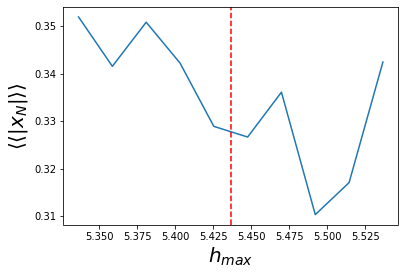

In [14]:
for l in ls:
    u4 = []
    m2 = []
    for h in hs:

        m2.append(np.average(np.average(np.abs(x[(h,l)]), axis=-1) ** 2))
        lnm4 = np.log(np.average(x[(h,l)] ** 4, axis=-1))
        lnm2 = np.log(np.average(x[(h,l)] ** 2, axis=-1))
        lambd = lnm4 - 2 * lnm2
        y = 0.5 * (3 - np.exp(lambd))
        u4.append(np.average(y))
        
    plt.plot(hs,m2)
    plt.xlabel(r'$h_{max}$',fontsize=20)
    plt.ylabel(r'$\langle \langle{|x_N|} \rangle \rangle$',fontsize=20)
    plt.axvline(x=2*np.e,label=r'$2 \cdot h_{c,1nn}$',color='red',linestyle='--')

plt.show()

#### Correlation Analysis

##### a) Convert the matrix in the c_i,i+r form

In [15]:
g={}
for l in ls:
    i=np.arange(l)
    for h in hs:
        for j in range(0,l):
            m = corr[(h,l)][:, i, (i + j) % l]
            if j == 0:
                ms = m.reshape(-1, 1, l)
            else:
                ms = np.append(ms, m.reshape(-1, 1, l), axis=-2)
        s=ms
        s=np.average(s,axis=-1)
        g[(h,l)]=s

##### b) Compute the average and see the log-log behaviour at different h_max

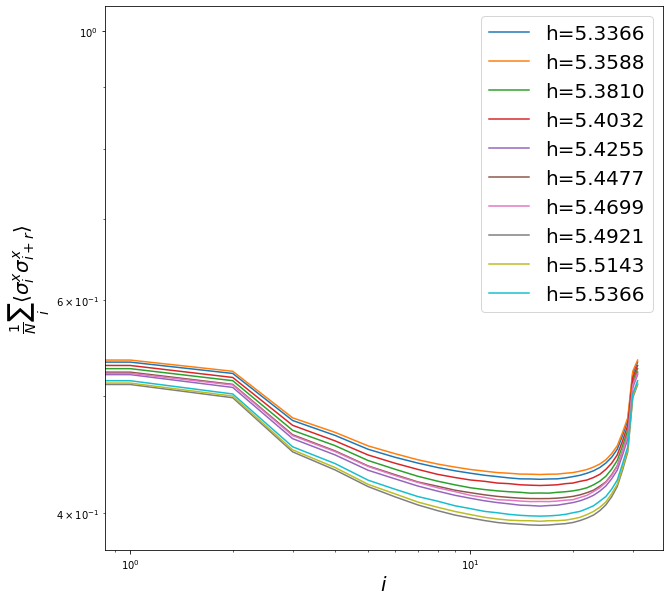

In [16]:
plt.figure(figsize=(10,10))
for h in hs:
    plt.plot(np.average(g[(h,l)],axis=0),label=f'h={h:.4f}')
plt.legend(fontsize=20)
plt.loglog()
plt.xlabel(r'$i$',fontsize=20)
plt.ylabel(r'$\frac{1}{N}\sum_i \langle \sigma^{x}_i \sigma^{x}_{i+r} \rangle$',fontsize=20)
plt.show()

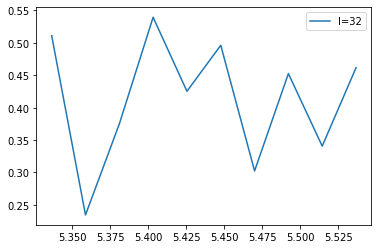

In [17]:
x={}
for l in ls:
    for h in hs:
        x[(h,l)]=np.average(g[(h,l)][int(l/2)])
    
for l in ls:
    plt.plot(hs,[x[(h,l)] for h in hs],label=f'l={l}')
plt.legend()
plt.show()    